# Homework 2

1. Bootstrap
2. Estimation and Confidence Intervals

## Task 1

Bootstrap replicates of other statistics

The mean is just one of many sample summaries that we might be interested in. 
Recall the Auto data, in particular the boxplot of mpg ~ cylinders. The graph suggested that not only does the mean mpg seem too decrease with number of cylinders but also the variation.
Let us get **confidence intervals** of the stdev for cyl = 4 and compare to cyl=6. 


1. Generate bootstrap replicates for the stdev of the mpg and plot the histograms and ecdfs of the replicates.
2. "Compute" the 95% confidence interval(s) which supposedly contains the true standard deviation(s).
3. Argue intuitively whether the stdevs are clearly different.

In [2]:
# running our functions
#%run r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\ourFunctions.py"
#%precision 

In [3]:
pwd

'C:\\Users\\svawe\\DataScience\\Homework_done'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load the dataframe
cars = pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\Auto.csv")
# filter by 4 and 6 cylinders
cyl_mpg =cars[["mpg", "cylinders"]]
cyl_4 = cyl_mpg[cyl_mpg["cylinders"] == 4]
cyl_6 = cyl_mpg[cyl_mpg["cylinders"] == 6]



In [6]:
len(cyl_4)

199

In [7]:
len(cyl_6)

83

In [8]:
def bootstrap_std(data, M = 1000, n = 100):
    array = np.zeros((M,n))
    
    for i in range(M):
        array[i] = np.random.choice(data, n)

    array_std = np.std(array, axis=1)
    return array_std

In [9]:
cyl4_boot = bootstrap_std(cyl_4["mpg"], 10000, 200)
cyl6_boot = bootstrap_std(cyl_6["mpg"], 10000, 200)

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

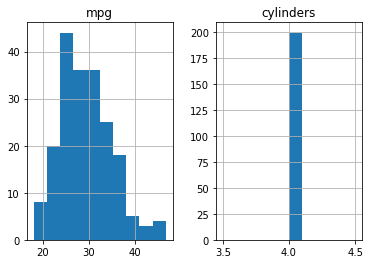

In [16]:
cyl_4.hist()

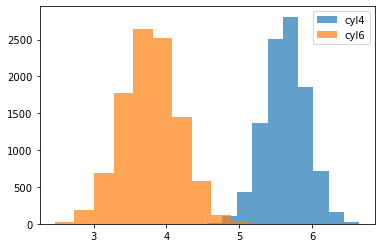

In [11]:
plt.hist(cyl4_boot, alpha = 0.7)
plt.hist(cyl6_boot, alpha = 0.7)
plt.legend(["cyl4","cyl6"])

In [12]:
def ecdf(data):
    #select and sort data for the x_axis
    x_axis = np.sort(data)
    #aranges the x-values evenly spaced along the y-axis (5000 evenly spaced points): start = 1, stop is len(data)+1 / len(data) -> this goes from basically 0 to basically 1
    ##having the x-values evenly spaced later allows interpretations that are "kind of like quantiles" -> Y% of data is below X
    y_axis = np.arange(1, len(data)+1)/len(data)
    #return allows the variables to be assigned to multiple variables when function is being called
    return x_axis, y_axis

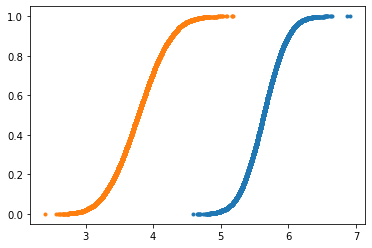

In [21]:
cyl_4_x, cyl_4_y = ecdf(cyl4_boot)
cyl_6_x, cly_6_y = ecdf(cyl6_boot)
plt.plot(cyl_4_x, cyl_4_y, marker = ".", linestyle="None")
plt.plot(cyl_6_x, cly_6_y, marker = ".", linestyle ="None")

In [56]:
CI_cyl4 = np.percentile(cyl4_boot, (2.5, 97.5))
CI_cyl6 = np.percentile(cyl6_boot, (2.5, 97.5))
print("the 95% CI for the SD of 4 cylinders is: ", CI_cyl4, "\nthe 95% CI for the SD of 6 cylinders is: ", CI_cyl6)

the 95% CI for the SD of 4 cylinders is:  [4.79709899 6.49472493] 
the 95% CI for the SD of 6 cylinders is:  [2.62764922 4.76351726]


I think the SD for the 4 and the 6 cylinders are clear seperable, given that their CI dont overlap! looking at this, I can be at least 95% sure, that the SD of 4 and 6 cylinders are different.

## Task 2

1. Read chapters 3-8 in the [ThinkStats](https://greenteapress.com/wp/think-python-2e/) book in the cloud folder.
2. Work on exercises 4.1 and 4.2:

**Exercise 4.1** How much did you weigh at birth? If you don't know, call your mother or someone else who knows. Using the NSFG data (all live births),
compute the distribution of birth weights and use it to find your percentile
rank. If you were a first baby, find your percentile rank in the distribution
for first babies. Otherwise use the distribution for others. If you are in the
90th percentile or higher, call your mother back and apologize.

**Exercise 4.2** The numbers generated by random.random are supposed to be
uniform between 0 and 1; that is, every value in the range should have the
same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF.
Is the distribution uniform?

### Task 4.1

In [2]:
#I have prepared the data for you in our data folder:
import pandas as pd
import numpy as np

#preg=pd.read_hdf('../data/pregNSFG.h5', 'df')
preg=pd.read_csv(r"C:\Users\svawe\OneDrive\Desktop\Master\DataScience_01\data\pregNSFG.csv.gz")

#only look at live births
live = preg[preg.outcome == 1]

#I think pregordr is the right variable to look at, if you are / are not a firstborn
not_firstborn = live[live.pregordr > 1]

In [3]:
#live.groupby("babysex").totalwgt_lb.plot(kind='density', legend=True)
#live.groupby("babysex").totalwgt_lb.mean()

In [4]:
#Kill unrealistic outliers
not_firstborn = not_firstborn[(not_firstborn["totalwgt_lb"] > 4) & (not_firstborn["totalwgt_lb"] < 13)]
not_firstborn.totalwgt_lb.describe()

count    5572.000000
mean        7.408437
std         1.207444
min         4.062500
25%         6.562500
50%         7.375000
75%         8.187500
max        12.500000
Name: totalwgt_lb, dtype: float64

In [5]:
#drop rows with "nan"
not_firstborn = not_firstborn.dropna(subset = ["totalwgt_lb"])

In [6]:
#relabeling the genders so the density plot looks better
not_firstborn.loc[not_firstborn.babysex == 1, "babysex"] = "male"
not_firstborn.loc[not_firstborn.babysex == 2, "babysex"] = "female"

babysex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: totalwgt_lb, dtype: object

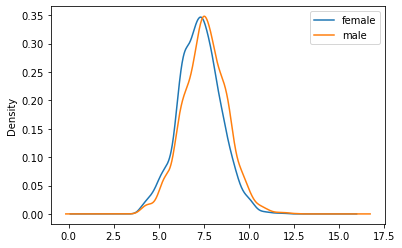

In [7]:
not_firstborn.groupby("babysex").totalwgt_lb.plot(kind="density", legend= True)

In [8]:
#my birthweight in lbs
my_weight = 9.039

In [9]:
weight_notfirst = not_firstborn.totalwgt_lb
weight_notfirst_male = not_firstborn.totalwgt_lb[not_firstborn.babysex == "male"]

In [10]:
wgt_all = np.quantile(weight_notfirst, 0.90)
wgt_male = np.quantile(weight_notfirst_male, 0.9)
print("90th percentile of the weight of all babies: ", wgt_all, "\n90th percentile of the weight of male babies: ", wgt_male)
#my poor mother!

90th percentile of the weight of all babies:  8.9375 
90th percentile of the weight of male babies:  9.0


In [13]:
x,y = ecdf(weight_notfirst)

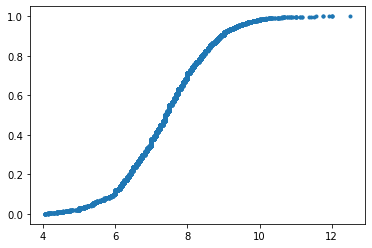

In [16]:
plt.plot(x,y, marker = ".", linestyle = "none")

### Task 4.2

In [23]:
draws = np.random.random(1000)

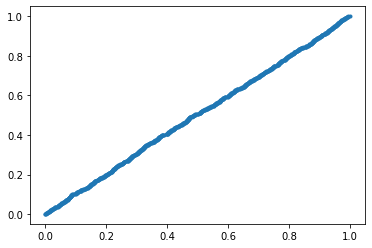

In [24]:
#plotting the CDF
x_draws, y_draws = ecdf(draws)
plt.plot(x_draws, y_draws, marker = ".", linestyle = "none")

In [27]:
bins = np.arange(0, max(draws) + 0.01, 0.05)
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

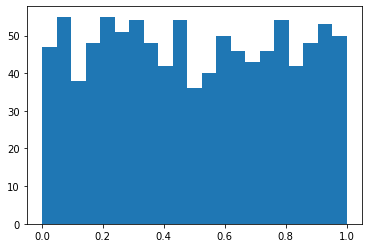

In [30]:
plt.hist(draws, bins = 21);